<a href="https://colab.research.google.com/github/LuizHVicari/Sistemas-Inteligentes/blob/main/HW8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão Linear

Crie um classificador do tipo regressão linear por método exato, mínimos quadrados (ver slide 18 L06)

O objeto final deve conter os métodos fit(), predict() e score()

A base de dados deve ser separada em base de treino e teste. A base de treino deve ter 66% dos dados e a base de teste deve ter 33% dos dados.

Deve ser plotado o scatterplot dos pontos e a reta de decisão obtida

A acurácia final deve ser medida na base de treino e na base de teste

In [88]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

lista_maca_peso = [168, 201, 184, 216, 177, 230, 149, 192, 206, 219, 177, 194, 241, 162, 207]
lista_maca_diam = [7.7, 9.2, 8.5, 9.8, 8.1, 10.1, 6.9, 8.8, 9.4, 10.0, 8.2, 9.0, 10.6, 7.5, 9.6]
maca = ['maca' for i in range(15)]

lista_laranja_peso = [150, 162, 170, 182, 195, 204, 213, 221, 234, 246, 257, 266, 278, 287, 296]
lista_laranja_diam = [6, 6.5, 6.8, 7.1, 7.4, 7.7, 8, 8.3, 8.6, 8.9, 9.2, 9.5, 9.8, 10.1, 10.4]
laranja = ['laranja' for i in range(15)]

peso = lista_maca_peso + lista_laranja_peso
diam = lista_maca_diam + lista_laranja_diam
frutas = maca + laranja

df = pd.DataFrame(columns=['peso', 'diametro', 'fruta'])
df['peso'] = peso
df['diametro'] = diam
df['fruta'] = frutas

df['fruta'] = df.apply(lambda x : 1 if x['fruta'] == 'maca' else 0, axis=1)

In [89]:
df

,peso,diametro,fruta
0,168,7.7,1
1,201,9.2,1
2,184,8.5,1
3,216,9.8,1
4,177,8.1,1
5,230,10.1,1
6,149,6.9,1
7,192,8.8,1
8,206,9.4,1
9,219,10.0,1


In [90]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['fruta']), df['fruta'])

In [91]:
from sklearn.preprocessing import StandardScaler

class LinearRegressor():
    def fit(self, X_train, y_train):
        X = np.c_[np.ones((X_train.shape[0], 1)), X_train]
        self.weights = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y_train)

    def predict(self, X):
        X_ = np.c_[np.ones((X.shape[0], 1)), X]
        return X_.dot(self.weights)

    def MSE(self, y, pred):
        return np.sum(np.square(y - pred)) / y.shape[0]

lr = LinearRegressor()
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
lr.fit(X_train, y_train)


In [92]:
lr.weights

array([ 0.5       , -0.72957164,  0.73630326])

In [93]:
pred = lr.predict(X_train)
pred, y_train.to_numpy()

(array([ 0.17336415,  0.05687758,  0.68100042, -0.06161881,  1.0329863 ,
         1.09575169, -0.10111761,  0.99549732,  1.05256821,  0.78426952,
         0.05587267,  0.11093373,  0.94963408,  1.1571772 ,  0.07813435,
         0.78493947,  1.15583731,  0.05486775, -0.15785353, -0.00186816,
         0.90812545,  0.19462092]),
 array([0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0]))

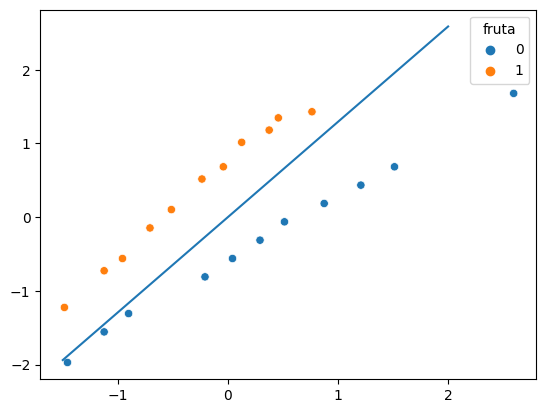

In [94]:
import seaborn as sns

line = lambda x: (x*-0.75)/-0.58

X = X_train#.to_numpy()
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y_train)
plt.plot([-1.5, 2.0], [line(-1.5), line(2.0)])

In [95]:
lr.MSE(X_train[:, 1], pred)

1.1536118766909844

In [96]:
def regressor_classifier(value):
    return 0 if value <= 0.5 else 1

In [97]:
from sklearn.model_selection import ShuffleSplit
import warnings

warnings.filterwarnings('ignore')

rs = ShuffleSplit(n_splits=5, test_size=0.33, random_state=1)

train_score = np.array([])
test_score = np.array([])

train_accuracy = np.array([])
test_accuracy = np.array([])

for i,(train_data, test_data)in enumerate(rs.split(df.drop(columns=['fruta']))):
    print(f'Iteração {i+1}')
    train_data_i = df.query(' index in @train_data')
    X_train_i = train_data_i.drop(columns=['fruta'])
    y_train_i = train_data_i['fruta']

    y_train_i = y_train_i[:,np.newaxis]

    test_data_i = df.query('index in @test_data')
    X_test_i = test_data_i.drop(columns=['fruta'])
    y_test_i = test_data_i['fruta']

    ss = StandardScaler()
    ss.fit(X_train_i)
    X_train_i = ss.transform(X_train_i)
    X_test_i = ss.transform(X_test_i)

    y_test_i = y_test_i[:,np.newaxis]

    lr = LinearRegressor()

    lr.fit(X_train_i, y_train_i)

    y_pred_train_i = lr.predict(X_train_i)
    y_pred_test_i = lr.predict(X_test_i)

    pred_i = list()

    for value in y_pred_train_i:
        pred_i.append(regressor_classifier(value))
    pred_i = np.c_[pred_i]
    train_acc = np.sum(pred_i == y_train_i)/ y_train_i.shape[0]
    print('Precisão na base de treino: ', train_acc)

    pred_i = list()

    for value in y_pred_test_i:
        pred_i.append(regressor_classifier(value))
    pred_i = np.c_[pred_i]
    test_acc = np.sum(pred_i == y_test_i)/ y_test_i.shape[0]
    print('Precisão na base de teste: ', test_acc)

    train_accuracy = np.append(train_accuracy, train_acc)
    test_accuracy = np.append(test_accuracy, test_acc)

    train_score_i = lr.MSE(y_pred_train_i, y_train_i)
    test_score_i = lr.MSE(y_pred_test_i, y_test_i)

    train_score = np.append(train_score, train_score_i)
    test_score = np.append(test_score, test_score_i)

    print(f'MSE na base de treino: {train_score_i}')
    print(f'MSE na base de teste: {test_score_i}')

print(f'\nMSE médio:\n\tTreino: {train_score.mean()}\n\tTeste: {test_score.mean()}')
print(f'STD:\n\tTreino: {train_score.std()}\n\tTeste: {test_score.std()}')
print(f'Acurácia média:\n\tTreino: {train_accuracy.mean()}\n\tTeste: {test_accuracy.mean()}')
print(f'STD:\n\tTreino: {train_accuracy.std()}\n\tTeste: {test_accuracy.std()}')

Iteração 1
Precisão na base de treino:  1.0
Precisão na base de teste:  1.0
MSE na base de treino: 0.018220876659026067
MSE na base de teste: 0.01652387301858506
Iteração 2
Precisão na base de treino:  1.0
Precisão na base de teste:  1.0
MSE na base de treino: 0.013582135079022312
MSE na base de teste: 0.02449840638025439
Iteração 3
Precisão na base de treino:  1.0
Precisão na base de teste:  1.0
MSE na base de treino: 0.014204734153338274
MSE na base de teste: 0.0384686272804571
Iteração 4
Precisão na base de treino:  1.0
Precisão na base de teste:  1.0
MSE na base de treino: 0.01594604988872389
MSE na base de teste: 0.017943454302128937
Iteração 5
Precisão na base de treino:  1.0
Precisão na base de teste:  1.0
MSE na base de treino: 0.011717017095848237
MSE na base de teste: 0.028954941745200045

MSE médio:
	Treino: 0.014734162575191756
	Teste: 0.02527786054532511
STD:
	Treino: 0.0022061946701244844
	Teste: 0.007981862120647535
Acurácia média:
	Treino: 1.0
	Teste: 1.0
STD:
	Treino: 